In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

# Download Census Tract Shapefiles for Ohio

https://www.census.gov/geo/maps-data/data/cbf/cbf_tracts.html

In [106]:
ohio = gpd.read_file("data/cb_2016_39_tract_500k/cb_2016_39_tract_500k.shp")

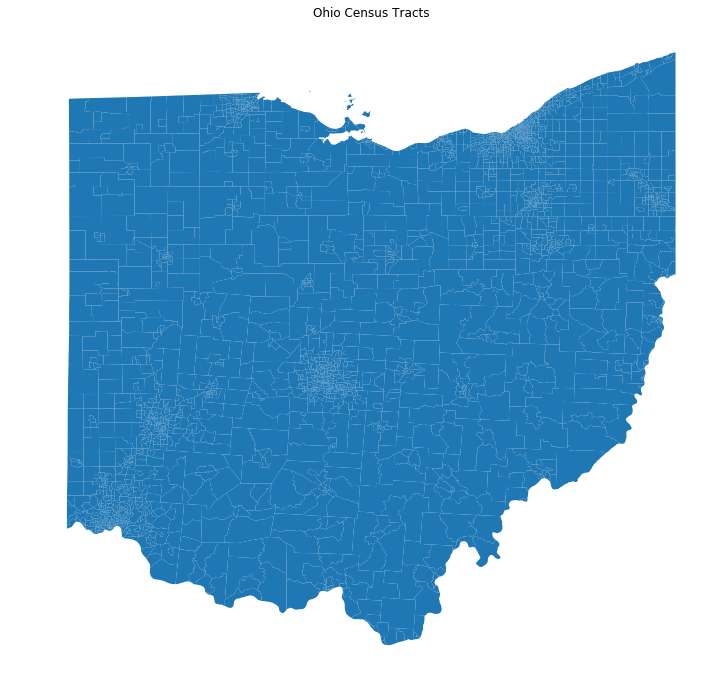

In [120]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = ohio.plot(ax=ax, linewidth=0)
ax.set_title("Ohio Census Tracts")
ax.set_axis_off()

# Download County Shapefiles for Ohio

https://catalog.data.gov/dataset/tiger-line-shapefile-2016-state-ohio-current-county-subdivision-state-based

In [144]:
ohio_counties = gpd.read_file("data/Ohio Counties/Ohio Counties.shp")

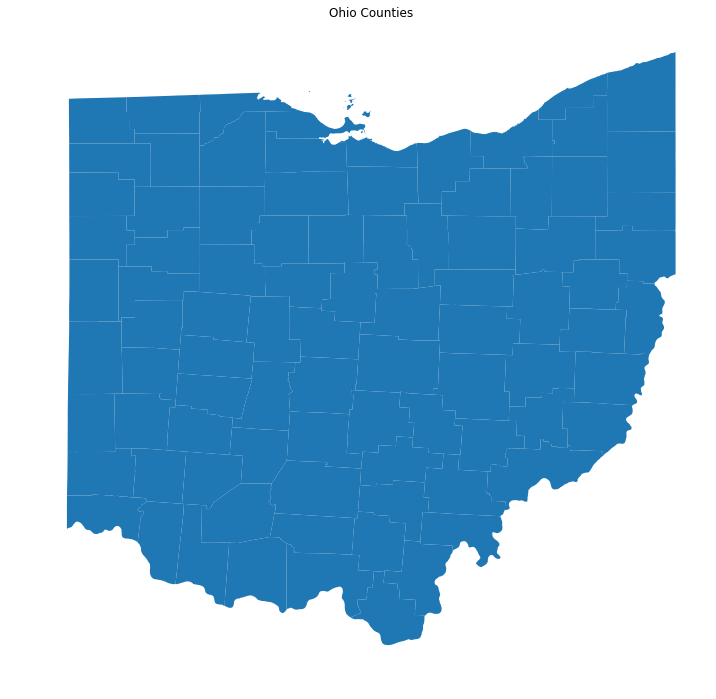

In [145]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = ohio_counties.plot(ax=ax, linewidth=1)
ax.set_title("Ohio Counties")
ax.set_axis_off()

# Download Employment Status Census Data for Ohio

    EMPLOYMENT STATUS
    2011-2015 American Community Survey 5-Year Estimates
    
https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_15_5YR_S2301&prodType=table

In [104]:
employment_status = pd.read_csv("data/ACS_15_5YR_S2301/ACS_15_5YR_S2301.csv", skiprows=1)
employment_status['Id2'] = employment_status['Id2'].apply(str)

In [105]:
employment_status.head()

,Id,Id2,Geography,Total; Estimate; Population 16 years and over,Total; Margin of Error; Population 16 years and over,Labor Force Participation Rate; Estimate; Population 16 years and over,Labor Force Participation Rate; Margin of Error; Population 16 years and over,Employment/Population Ratio; Estimate; Population 16 years and over,Employment/Population Ratio; Margin of Error; Population 16 years and over,Unemployment rate; Estimate; Population 16 years and over,...,Unemployment rate; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Some college or associate's degree,Unemployment rate; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Some college or associate's degree,Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Total; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Labor Force Participation Rate; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Labor Force Participation Rate; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Employment/Population Ratio; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Employment/Population Ratio; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Unemployment rate; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Unemployment rate; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher
0,1400000US39001770100,39001770100,"Census Tract 7701, Adams County, Ohio",3658,247,49.5,4.8,43.5,5.0,12.2,...,12.5,7.3,286,114,75.5,11.3,75.5,11.3,0.0,11.9
1,1400000US39001770200,39001770200,"Census Tract 7702, Adams County, Ohio",3722,275,55.3,4.8,47.2,5.3,14.7,...,10.2,6.1,321,102,82.9,12.3,81.9,12.3,1.1,1.9
2,1400000US39001770300,39001770300,"Census Tract 7703, Adams County, Ohio",5381,339,56.1,4.7,50.0,5.3,10.8,...,7.1,8.0,420,153,87.4,12.3,83.3,13.0,4.6,6.7
3,1400000US39001770400,39001770400,"Census Tract 7704, Adams County, Ohio",3718,299,52.3,5.7,44.5,5.4,15.0,...,18.8,14.3,234,104,73.1,23.0,73.1,23.0,0.0,14.8
4,1400000US39001770500,39001770500,"Census Tract 7705, Adams County, Ohio",2684,244,50.7,6.6,45.8,6.6,9.6,...,13.0,12.3,98,65,79.6,23.7,71.4,30.9,10.3,22.6


# Join Unemployment Rate to Census Tract

In [146]:
merged = pd.merge(ohio, employment_status[['Id2', 'Unemployment rate; Estimate; Population 16 years and over']],
                 how='left', left_on='GEOID', right_on='Id2')
merged.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Id2,Unemployment rate; Estimate; Population 16 years and over
0,39,003,011000,1400000US39003011000,39003011000,110,CT,13509935,6019,"POLYGON ((-84.184817 40.780224, -84.137804 40....",39003011000,7.7
1,39,003,011400,1400000US39003011400,39003011400,114,CT,92511401,797645,"POLYGON ((-83.994343 40.81805, -83.937461 40.8...",39003011400,5.8
2,39,003,012900,1400000US39003012900,39003012900,129,CT,824393,0,"POLYGON ((-84.124493 40.742607, -84.1242259999...",39003012900,14.3
3,39,003,013600,1400000US39003013600,39003013600,136,CT,1410035,136278,"POLYGON ((-84.10136799999999 40.730312, -84.09...",39003013600,13.2
4,39,169,000800,1400000US39169000800,39169000800,8,CT,37923826,54135,"POLYGON ((-81.95089 40.879932, -81.934686 40.8...",39169000800,2.4


# Unemployment Rate by Census Tract in Ohio

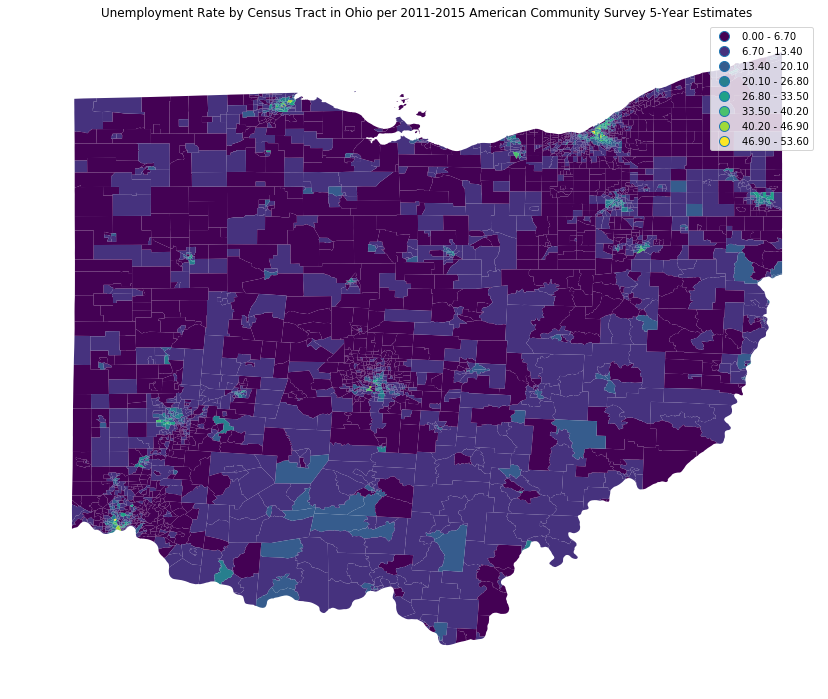

In [147]:
f, ax = plt.subplots(1, figsize=(14, 12))
ax = merged.plot(column='Unemployment rate; Estimate; Population 16 years and over',
                 ax=ax, linewidth=0, cmap='viridis', legend=True,
                 scheme='equal_interval', k=8 )
ax.set_title("Unemployment Rate by Census Tract in Ohio per 2011-2015 American Community Survey 5-Year Estimates")
ax.set_axis_off()

# Download Educational Attainment Data in Ohio

https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_15_5YR_B23006&prodType=table

In [148]:
educational_attainment = pd.read_csv("data/ACS_15_5YR_B23006/ACS_15_5YR_B23006.csv", skiprows=1)
educational_attainment['Id2'] = educational_attainment['Id2'].apply(str)
educational_attainment['Less than high school graduate pct'] = educational_attainment["Estimate; Less than high school graduate:"] \
                                                               / educational_attainment['Estimate; Total:']

In [149]:
educational_attainment.head()

,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Less than high school graduate:,Margin of Error; Less than high school graduate:,Estimate; Less than high school graduate: - In labor force:,Margin of Error; Less than high school graduate: - In labor force:,Estimate; Less than high school graduate: - In labor force: - In Armed Forces,...,Margin of Error; Bachelor's degree or higher: - In labor force: - In Armed Forces,Estimate; Bachelor's degree or higher: - In labor force: - Civilian:,Margin of Error; Bachelor's degree or higher: - In labor force: - Civilian:,Estimate; Bachelor's degree or higher: - In labor force: - Civilian: - Employed,Margin of Error; Bachelor's degree or higher: - In labor force: - Civilian: - Employed,Estimate; Bachelor's degree or higher: - In labor force: - Civilian: - Unemployed,Margin of Error; Bachelor's degree or higher: - In labor force: - Civilian: - Unemployed,Estimate; Bachelor's degree or higher: - Not in labor force,Margin of Error; Bachelor's degree or higher: - Not in labor force,Less than high school graduate pct
0,1400000US39001770100,39001770100,"Census Tract 7701, Adams County, Ohio",2429,207,498,102,168,55,0,...,11,216,87,216,87,0,11,70,44,0.205023
1,1400000US39001770200,39001770200,"Census Tract 7702, Adams County, Ohio",2525,213,387,133,157,53,0,...,11,266,93,263,93,3,5,55,44,0.153267
2,1400000US39001770300,39001770300,"Census Tract 7703, Adams County, Ohio",3498,282,682,223,289,136,0,...,15,367,136,350,134,17,25,53,57,0.194969
3,1400000US39001770400,39001770400,"Census Tract 7704, Adams County, Ohio",2398,237,370,185,191,159,0,...,11,171,102,171,102,0,11,63,54,0.154295
4,1400000US39001770500,39001770500,"Census Tract 7705, Adams County, Ohio",1839,207,428,128,156,74,0,...,11,78,61,70,62,8,13,20,21,0.232735


# Join Educational Attainment to Census Tract

In [150]:
merged = pd.merge(merged, educational_attainment[['Id2', 'Less than high school graduate pct']],
                 how='left', left_on='GEOID', right_on='Id2')
merged.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Id2_x,Unemployment rate; Estimate; Population 16 years and over,Id2_y,Less than high school graduate pct
0,39,003,011000,1400000US39003011000,39003011000,110,CT,13509935,6019,"POLYGON ((-84.184817 40.780224, -84.137804 40....",39003011000,7.7,39003011000,0.041350
1,39,003,011400,1400000US39003011400,39003011400,114,CT,92511401,797645,"POLYGON ((-83.994343 40.81805, -83.937461 40.8...",39003011400,5.8,39003011400,0.049822
2,39,003,012900,1400000US39003012900,39003012900,129,CT,824393,0,"POLYGON ((-84.124493 40.742607, -84.1242259999...",39003012900,14.3,39003012900,0.149045
3,39,003,013600,1400000US39003013600,39003013600,136,CT,1410035,136278,"POLYGON ((-84.10136799999999 40.730312, -84.09...",39003013600,13.2,39003013600,0.202229
4,39,169,000800,1400000US39169000800,39169000800,8,CT,37923826,54135,"POLYGON ((-81.95089 40.879932, -81.934686 40.8...",39169000800,2.4,39169000800,0.064220


# Educational Attainment by Census Tract in Ohio

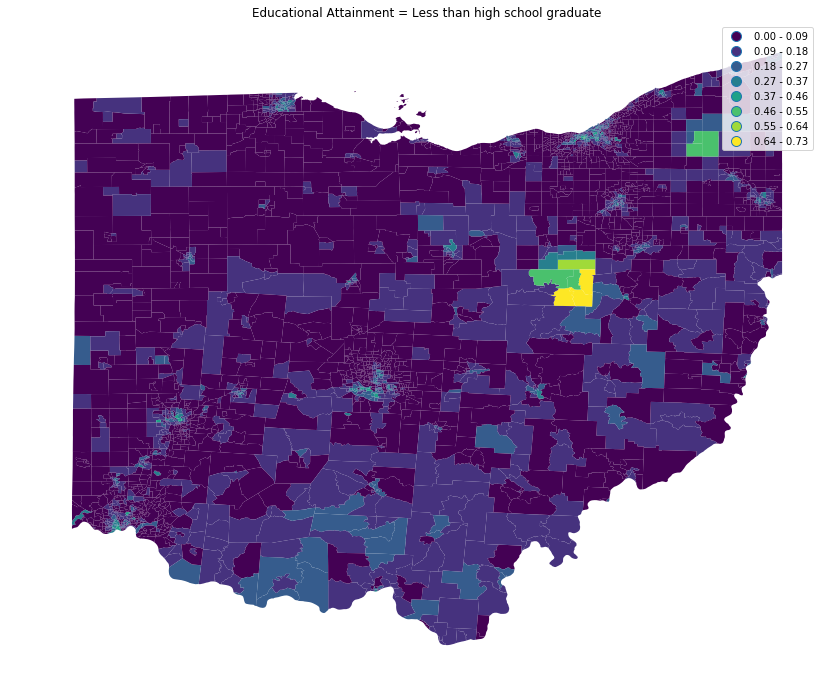

In [151]:
f, ax = plt.subplots(1, figsize=(14, 12))
ax = merged.plot(column='Less than high school graduate pct',
                 ax=ax, linewidth=0, cmap='viridis', legend=True,
                 scheme='equal_interval', k=8 )
ax.set_title("Educational Attainment = Less than high school graduate")
ax.set_axis_off()

# Load Overdoses Data

In [152]:
overdoses = pd.read_excel("data/ReportOutput overdoses.xls", skiprows=3)
del overdoses['Unnamed: 0']

In [154]:
counties_merged = pd.merge(ohio_counties, overdoses[['County',u'Death Rate.6']] , how='left',
        left_on='NAME', right_on='County')

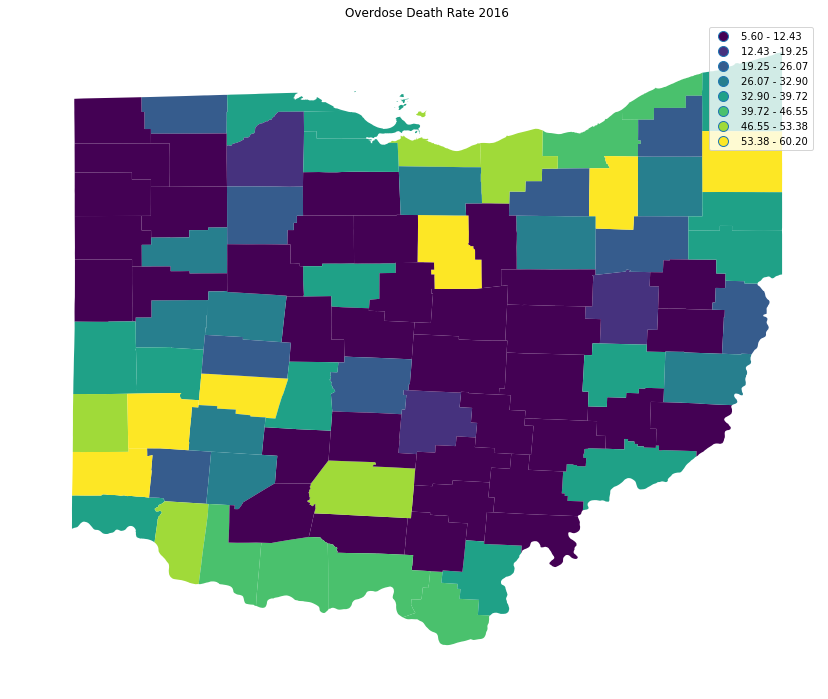

In [157]:
f, ax = plt.subplots(1, figsize=(14, 12))
ax = counties_merged.plot(column='Death Rate.6',
                 ax=ax, linewidth=0, cmap='viridis', legend=True,
                 scheme='equal_interval', k=8 )
ax.set_title("Overdose Death Rate 2016")
ax.set_axis_off()